In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

In [4]:
print(X.T)
print(y.T)

[[ 1  2  3  4  5  6  7  8  9 10]]
[[  45000   50000   60000   80000  110000  150000  200000  300000  500000
  1000000]]


# Feature Scaling the Data

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y) #scaling needs elements to be in certain format

In [6]:
print(X.T)
print(y.T)

[[-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
   0.52223297  0.87038828  1.21854359  1.5666989 ]]
[[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
  -0.17428902  0.17781001  0.88200808  2.64250325]]


# Training the SVR Model

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
y = y.ravel()

regressor.fit(X, y)

SVR()

In [8]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1)) #use .transform() not .fit_transform()

array([[170370.0204065]])

# Visualization

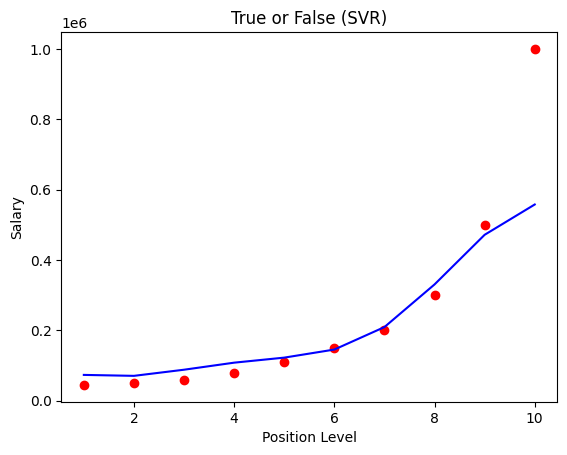

In [9]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(1,-1)), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('True or False (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# High Resolution Visualization

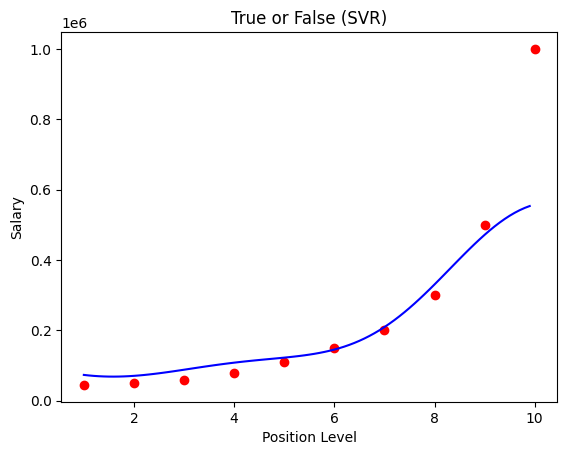

In [12]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(1,-1)), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('True or False (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Done